In [18]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage, HumanMessage

In [19]:
load_dotenv()

True

In [31]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    score: str

    

In [32]:
model = ChatOpenAI()

In [34]:
def create_outline(state: BlogState) -> BlogState:

    title=state['title']

    prompt = f'Generate a detailed outline for a blog on the topic -> {title}'

    outline = model.invoke(prompt)

    return {
        'outline':outline
    }

In [35]:
def create_blog(state: BlogState)-> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'write a detailed blog on the title -{title} using the following outline - {outline}'
    
    content = model.invoke(prompt)

    state['content'] = content

    return state

In [45]:
def evaluator(state: BlogState) -> BlogState:
    title = state['title']
    content = state['content']

    # Step 1: Create the prompt template
    prompt_template = ChatPromptTemplate.from_messages([
        ('system', 'You are an evaluator who evaluates content based on the title.'),
        ('user', 'Kindly evaluate the content: "{content}" based on the title: "{title}" and give only an integer output between 1 and 10.')
    ])

    # Step 2: Format the template
    formatted_prompt = prompt_template.format_messages(content=content, title=title)

    # Step 3: Send it to the model
    score = model.invoke(formatted_prompt).content

    # Step 4: Store the result
    state['score'] = score

    return state

In [46]:
graph = StateGraph(BlogState)

graph.add_node('create_outline',create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluator',evaluator)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog','evaluator')
graph.add_edge('evaluator',END)


workflow = graph.compile()

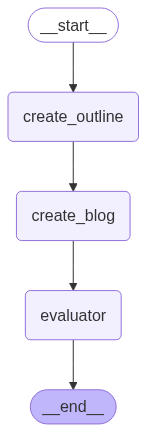

In [47]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [48]:
initial_state = {'title':'python scope of variables'}

final_state = workflow.invoke(initial_state)

# with open('scope.txt','a') as f:
#     f.write(final_state['outline'].content)
#     f.write(final_state['content'])
#     f.write(final_state['score'])

In [49]:
final_state['content']

AIMessage(content="# Python Scope of Variables\n\n## I. Introduction\n### A. Definition of Python variables\nIn Python, variables are used to store data values that can be accessed and manipulated throughout the program. Variables in Python are dynamically typed, meaning that their data type is determined at runtime.\n\n### B. Importance of understanding variable scope in Python\nUnderstanding variable scope is crucial in Python programming as it determines where a variable can be accessed within a program. It helps in avoiding naming conflicts and unintended side effects.\n\n### C. Overview of the scope of variables in Python\nPython has three main types of variable scope: local, global, and nonlocal. Each type of scope determines where a variable can be accessed and modified within a program.\n\n## II. Local Variables\n### A. Definition of local variables\nLocal variables are defined within a function or a block of code and can only be accessed within that specific function or block.

In [53]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate([
    ('system', 'You are a helpful {domain} expert'),
    ('human', 'Explain in simple terms, what is {topic}')
])

prompt = chat_template.invoke({'domain':'cricket','topic':'Dusra'})
prompt2 = chat_template.format_messages(domain = 'cricket', topic = 'Dusra' )

print(prompt2)
print(prompt)

[SystemMessage(content='You are a helpful cricket expert', additional_kwargs={}, response_metadata={}), HumanMessage(content='Explain in simple terms, what is Dusra', additional_kwargs={}, response_metadata={})]
messages=[SystemMessage(content='You are a helpful cricket expert', additional_kwargs={}, response_metadata={}), HumanMessage(content='Explain in simple terms, what is Dusra', additional_kwargs={}, response_metadata={})]


In [51]:
# model.invoke(prompt).content

In [54]:
final_state['score']

'10'